# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#url=http://api.openweathermap.org/data/2.5/weather?appid=9e8ad36944a36af2b33e09daa8e352bb&units=metric&q=
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
lat= []
temp=[]
cityname=[]
humidity=[]
clouds=[]
windspeed=[]
country=[]
long=[]
date=[]
#Query URL
query_url= f"{url}appid={weather_api_key}&units={units}&q="
for city in cities[:50]:
    
    
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cityname.append(city)
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        print(city)
    except:
        print("city not found")
        pass
  


soavinandriana
krizevci
dingle
papara
luderitz
kavaratti
city not found
kodiak
pisco
city not found
sao filipe
la ronge
atuona
city not found
ushuaia
yar-sale
jalu
dikson
fukue
jamestown
arraial do cabo
ribeira grande
port blair
russell
isangel
ust-shonosha
city not found
chuy
kapaa
dalbandin
city not found
alpine
port elizabeth
mataura
albany
provideniya
pointe michel
wurzburg
fairbanks
ler
severo-kurilsk
cape town
shelburne
vaini
merauke
alakurtti
carnarvon
avarua
punta arenas
benidorm


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict= {
            "City": cityname,
            "Country":country,
            "Date":date,
            "Longitude":long,
            "Latitude":   lat,
            "Temperature": temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": windspeed
            
}
weather_data= pd.DataFrame(weather_dict)

weather_data.head(20)

,City,Country,Date,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,soavinandriana,MG,1619637959,46.7333,-19.1667,57.00,93,1,4.97
1,krizevci,HR,1619637960,16.5425,46.0219,50.90,82,40,1.14
2,dingle,PH,1619637640,122.6711,10.9995,73.99,87,95,5.53
3,papara,BR,1619637960,-38.7273,-3.9839,83.59,74,20,13.80
4,luderitz,NA,1619637961,15.1594,-26.6481,62.19,79,0,16.08
5,kavaratti,IN,1619637961,72.6420,10.5669,84.52,70,0,5.03
6,kodiak,US,1619637924,-152.4072,57.7900,42.80,87,90,12.66
7,pisco,PE,1619637935,-76.2167,-13.7000,66.11,88,90,8.05
8,sao filipe,CV,1619637962,-24.4956,14.8961,73.17,75,40,14.61
9,la ronge,CA,1619637962,-105.2842,55.1001,30.20,40,100,5.75


In [28]:
weather_data.to_csv('citydatainfo.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

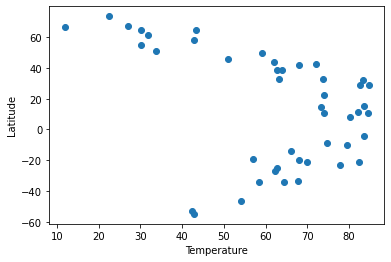

In [29]:
plt.scatter(weather_data["Temperature"],weather_data["Latitude"])
plt.xlabel("Temperature")
plt.ylabel("Latitude")

In [30]:
#There seems to be a negative correlation between high latitudes and lower temperatures 

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

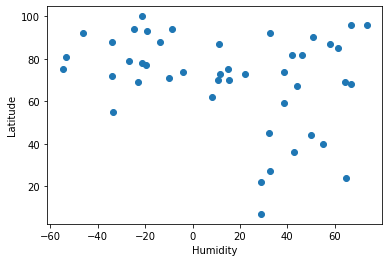

In [31]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")

In [32]:
# There doesn't seem to be a correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

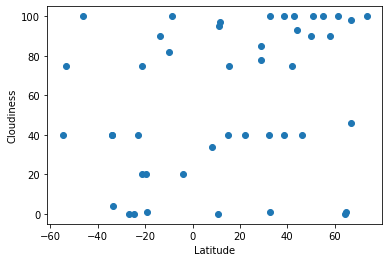

In [33]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [34]:
#Latitude doesn't have an impact on how cloudy a city is. 

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

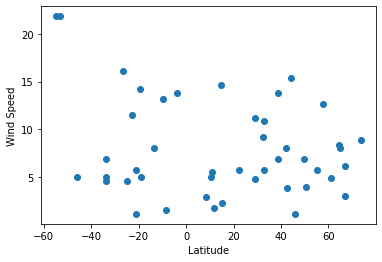

In [35]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [36]:
#The majority of wind speed is under 15 MPH

## Linear Regression

In [37]:

def linear_hemisphere (x_values,y_values,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("latitude")
    plt.ylabel(title)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

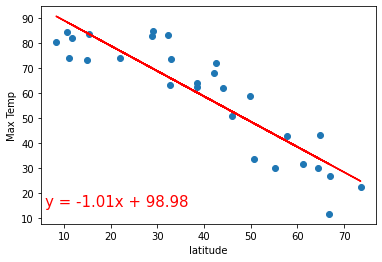

In [38]:
north_hemisphere_data= weather_data.loc[weather_data["Latitude"]>=0]
south_hemisphere_data=weather_data.loc[weather_data["Latitude"] >=0]
x_values=north_hemisphere_data["Latitude"]
y_values=north_hemisphere_data["Temperature"]
linear_hemisphere(x_values,y_values,"Max Temp",(6,15))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
x_values=south_

NameError: name 'south_' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression